<a href="https://colab.research.google.com/github/vivekkchandra/CE888Assignment/blob/master/PostAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [0]:
africadf = pd.read_csv('https://raw.githubusercontent.com/vivekkchandra/CE888Assignment/master/Assignment2/Data/africa_recession.csv', sep=',', quotechar='"')

insurancedf = pd.read_csv('https://raw.githubusercontent.com/vivekkchandra/CE888Assignment/master/Assignment2/Data/insurance80.csv', sep=',', quotechar='"')

choicedf = pd.read_csv('https://raw.githubusercontent.com/vivekkchandra/CE888Assignment/master/Assignment2/Data/ContraceptiveMethodChoiceDataSet.csv',names=['Wife Age','Wife Education','Husband Education','Number of Children','Wife religion','Wife working','Husband Occupation','SOLI','Media Exposure','Contraceptive Method'] ,sep=',', quotechar='"')


In [0]:
print(africadf)

In [0]:
africadf.info()

Add ID

In [6]:
countryID=np.array(range(len(africadf)))

africadf['CountryID']=countryID

print(africadf)

           pop        emp  ...  growthbucket  CountryID
0    28.849621   6.914298  ...             0          0
1    45.728313  13.623806  ...             0          1
2    33.262043  13.323813  ...             0          2
3     8.025703   3.869000  ...             0          3
4     1.061468   0.243000  ...             0          4
..         ...        ...  ...           ...        ...
481  12.208407   6.215000  ...             0        481
482  29.784193  15.389316  ...             1        482
483  55.797787  25.301973  ...             0        483
484  15.850567   5.277823  ...             0        484
485   7.797694   3.468000  ...             0        485

[486 rows x 51 columns]


In [7]:
africadf['growthbucket'].value_counts() ##finding the target variable 

0    448
1     38
Name: growthbucket, dtype: int64

In [8]:
africadf.describe()

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change,growthbucket,CountryID
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.00000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,20.185755,7.121089,0.357865,1.777389,64361.006942,80885.988722,2.442244e+05,0.004583,0.454419,0.453431,68169.779343,86894.648830,2.960933e+05,0.922019,0.988884,0.956187,0.513159,0.115962,0.048087,447.069460,0.420510,0.425005,0.411562,0.679354,0.206769,0.174061,0.168543,-0.225677,-0.003049,0.430719,0.474535,0.407058,0.623058,0.592560,0.394489,480.433333,315.391667,1205.33000,512.912222,322.411667,221.326667,1009.445556,0.044535,0.030346,0.082411,0.058144,0.024774,0.033930,0.023741,0.078189,242.500000
std,30.037490,9.921471,0.080541,0.446339,129634.856793,156740.416624,4.725163e+05,0.008210,0.206562,0.203056,136352.268853,164892.302342,5.126251e+05,0.340277,0.143482,0.140860,0.148923,0.073690,0.012163,797.259327,0.126245,0.117072,0.117266,0.158903,0.088993,0.063082,0.142386,0.132546,0.090130,0.136076,0.142659,0.160308,0.104425,0.076358,0.386874,132.323682,65.322380,416.62894,173.040876,44.315222,49.803981,140.125951,0.184025,0.105616,0.288454,0.151285,0.129924,0.127101,0.076937,0.268746,140.440379
min,1.061468,0.243000,0.198212,1.069451,2781.259277,2984.366943,5.790397e+03,0.000124,0.098622,0.107790,2786.592285,2978.288574,8.735905e+03,0.136824,0.429515,0.382910,0.164316,0.010000,0.024867,1.000000,0.150231,0.146762,0.128689,0.223663,0.049954,0.016554,0.012206,-0.784460,-0.652756,0.154627,0.030470,0.044227,0.375171,0.432636,0.062744,274.690000,205.270000,586.13000,241.900000,245.560000,149.370000,843.660000,-0.359446,-0.173741,-0.477017,-0.157564,-0.174550,-0.225998,-0.113858,0.000000,0.000000
25%,3.830730,1.048750,0.297922,1.445886,9117.209716,11081.697755,2.429231e+04,0.000514,0.301179,0.295615,8797.567871,10660.792725,3.465814e+04,0.709967,0.946962,0.900594,0.426136,0.063373,0.041254,8.609180,0.338547,0.349186,0.329368,0.594391,0.142124,0.132076,0.059928,-0.299666,-0.034658,0.346740,0.383279,0.299052,0.536308,0.541171,0.294728,355.210000,271.740000,801.96000,331.440000,289.580000,185.770000,899.190000,-0.058931,-0.044322,-0.102940,-0.053405,-0.060792,-0.026451,-0.020995,0.000000,121.250000
50%,10.868272,4.184000,0.368841,1.689902,17471.495120,22228.022460,6.432356e+04,0.001355,0.400647,0.405870,16610.300780,21656.230470,7.413105e+04,0.933401,1.000000,0.978814,0.523287,0.107553,0.046315,152.079811,0.409295,0.422608,0.408461,0.708287,0.193263,0.168642,0.136851,-0.186369,0.000000,0.416230,0.471758,0.383152,0.640564,0.607994,0.357652,485.785000,326.945000,1285.16500,562.320000,328.020000,213.095000,948.745000,0.061860,0.019950,0.054933,0.046808,0.003277,0.038444,0.006529,0.000000,242.500000
75%,24.220695,8.517560,0.416717,2.117452,58016.873047,69676.791020,1.886244e+05,0.003227,0.616736,0.603459,61146.049805,81660.662112,2.488039e+05,1.037367,1.038464,1.015393,0.612079,0.161361,0.052742,550.521500,0.490157,0.489201,0.487113,0.792734,0.268336,0.208797,0.221857,-0.126700,0.041204,0.495139,0.558896,0.497188,0.715812,0.645224,0.433157,611.580000,363.530000,1555.86000,642.820000,348.510000,265.400000,1095.320000,0.208732,0.105791,0.245094,0.154531,0.096810,0.112793,0.047421,

In [9]:
print(insurancedf)

      age  sex     bmi  children  region      charges  smoker
0      19    0  27.900         0       2  16884.92400       1
1      18    1  33.770         1       3   1725.55230       0
2      28    1  33.000         3       3   4449.46200       0
3      33    1  22.705         0       0  21984.47061       0
4      32    1  28.880         0       0   3866.85520       0
...   ...  ...     ...       ...     ...          ...     ...
1333   50    1  30.970         3       0  10600.54830       0
1334   18    0  31.920         0       1   2205.98080       0
1335   18    0  36.850         0       3   1629.83350       0
1336   21    0  25.800         0       2   2007.94500       0
1337   61    0  29.070         0       0  29141.36030       1

[1338 rows x 7 columns]


In [10]:
insurancedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   region    1338 non-null   int64  
 5   charges   1338 non-null   float64
 6   smoker    1338 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [18]:
print(choicedf)

      Wife Age  Wife Education  ...  Media Exposure  Contraceptive Method
0           24               2  ...               0                     1
1           45               1  ...               0                     1
2           43               2  ...               0                     1
3           42               3  ...               0                     1
4           36               3  ...               0                     1
...        ...             ...  ...             ...                   ...
1468        33               4  ...               0                     3
1469        33               4  ...               0                     3
1470        39               3  ...               0                     3
1471        33               3  ...               0                     3
1472        17               3  ...               0                     3

[1473 rows x 10 columns]


In [19]:
choicedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Wife Age              1473 non-null   int64
 1   Wife Education        1473 non-null   int64
 2   Husband Education     1473 non-null   int64
 3   Number of Children    1473 non-null   int64
 4   Wife religion         1473 non-null   int64
 5   Wife working          1473 non-null   int64
 6   Husband Occupation    1473 non-null   int64
 7   SOLI                  1473 non-null   int64
 8   Media Exposure        1473 non-null   int64
 9   Contraceptive Method  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [20]:
#Double check if there is missing values
choicedf.isnull().any().sum()>0

False

In [21]:
choicedf.describe()

,Wife Age,Wife Education,Husband Education,Number of Children,Wife religion,Wife working,Husband Occupation,SOLI,Media Exposure,Contraceptive Method
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [22]:
#Adding ID
ID=np.array(range(len(choicedf)))

choicedf['ID']=ID

print(choicedf)

      Wife Age  Wife Education  ...  Contraceptive Method    ID
0           24               2  ...                     1     0
1           45               1  ...                     1     1
2           43               2  ...                     1     2
3           42               3  ...                     1     3
4           36               3  ...                     1     4
...        ...             ...  ...                   ...   ...
1468        33               4  ...                     3  1468
1469        33               4  ...                     3  1469
1470        39               3  ...                     3  1470
1471        33               3  ...                     3  1471
1472        17               3  ...                     3  1472

[1473 rows x 11 columns]


In [27]:
#binary classification
choicedf['Contraceptive Method'].value_counts()
# binary classification 0 is not used and 1 is used contraceptive
choicedf['Contraceptive Method']=[0 if b== 1 else 1 for b in choicedf['Contraceptive Method']]
choicedf['Contraceptive Method'].value_counts()
print(choicedf)

      Wife Age  Wife Education  ...  Contraceptive Method    ID
0           24               2  ...                     1     0
1           45               1  ...                     1     1
2           43               2  ...                     1     2
3           42               3  ...                     1     3
4           36               3  ...                     1     4
...        ...             ...  ...                   ...   ...
1468        33               4  ...                     0  1468
1469        33               4  ...                     0  1469
1470        39               3  ...                     0  1470
1471        33               3  ...                     0  1471
1472        17               3  ...                     0  1472

[1473 rows x 11 columns]


Representing Imbalance

Percentage of Recession is 7.818930041152264
Percentage of No Recession is 92.18106995884774


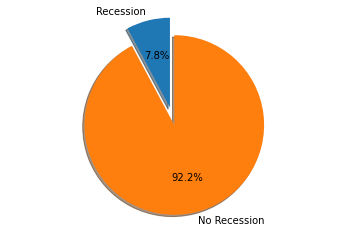

In [28]:
#africandf
recession= len(africadf[africadf['growthbucket']==1])
no_recession=len(africadf[africadf['growthbucket']==0])

percentofrecession= recession/(recession+no_recession)
percentofnorecession= no_recession/(recession+no_recession)

print("Percentage of Recession is", percentofrecession*100)
print("Percentage of No Recession is", percentofnorecession*100)
labels = 'Recession','No Recession'

sizes=[percentofrecession,percentofnorecession]

explode=(0.2,0)

fig1, ax1 =plt.subplots()

ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%', shadow= True, startangle=90)

ax1.axis('equal')

plt.show()

Percentage of Non smoker is 79.52167414050822
Percentage of smoker is 20.47832585949178


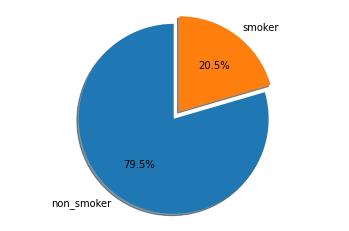

In [31]:
#insurancedf
non_smoker= len(insurancedf[insurancedf['smoker']==0])
smoker=len(insurancedf[insurancedf['smoker']==1])

percentofsmoker= smoker/(smoker+non_smoker)
percentofnon_smoker=non_smoker/(smoker+non_smoker)

print("Percentage of Non smoker is", percentofnon_smoker*100)
print("Percentage of smoker is", percentofsmoker*100)

labels = 'non_smoker','smoker'

sizes=[percentofnon_smoker,percentofsmoker]

explode=(0.1,0)

fig1, ax1 =plt.subplots()

ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%', shadow= True, startangle=90)

ax1.axis('equal')

plt.show()

Percentage of No Use is 57.298031228784794
Percentage of used is 42.701968771215206


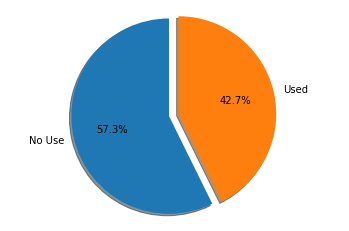

In [33]:
#choicedf
noused= len(choicedf[choicedf['Contraceptive Method']==0])
used=len(choicedf[choicedf['Contraceptive Method']==1])

percentofnoused= noused/(used+noused)
percentofused=used/(used+noused)

print("Percentage of No Use is", percentofnoused*100)
print("Percentage of used is", percentofused*100)

labels = 'No Use','Used'

sizes=[percentofnoused,percentofused]

explode=(0.1,0)

fig1, ax1 =plt.subplots()

ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%', shadow= True, startangle=90)

ax1.axis('equal')

plt.show()